# Unsupervised Learning (K-means Clustering)
To find optimized number of clusters and visualize them graphically

In [14]:
#importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 


In [15]:
#importing the csv file of iris dataset
irisData = datasets.load_iris()
iris_df = pd.DataFrame(irisData.data, columns = irisData.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
Iris_df = pd.read_csv(r'C:\Users\Administrator\Downloads\iris.csv', index_col = 'Id')
Iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualisation using Seaborn on the dataset

Text(0.5, 1.0, 'Petal Length vs Sepal Length')

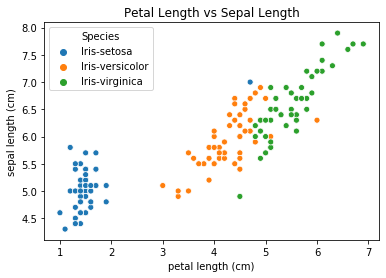

In [17]:
sns.scatterplot(x = iris_df['petal length (cm)'], y = iris_df['sepal length (cm)'], hue = Iris_df["Species"])
plt.title("Petal Length vs Sepal Length")

Text(0.5, 1.0, 'Petal Length of Each Species')

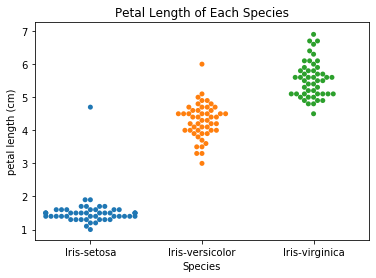

In [18]:
sns.swarmplot(x = Iris_df['Species'], y = iris_df['petal length (cm)'])
plt.title("Petal Length of Each Species")

Text(0.5, 1.0, 'Sepal Length of Each Species')

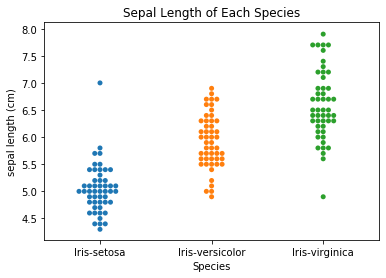

In [19]:
sns.swarmplot(x = Iris_df['Species'], y = iris_df['sepal length (cm)'])
plt.title("Sepal Length of Each Species")

# Finding the optimised value of k using elbow method. 

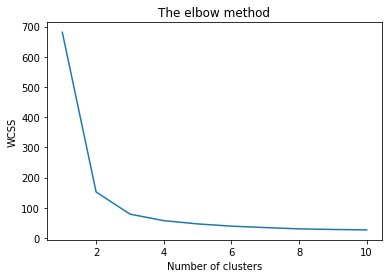

In [20]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Creating K-means classifier

In [21]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

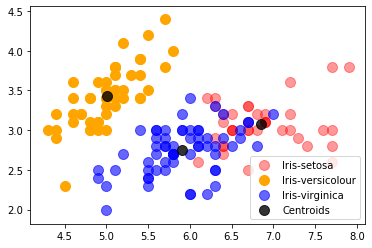

In [22]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', alpha = 0.4, label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', alpha = 0.6, label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', alpha = 0.8, label = 'Centroids')

plt.legend()